# Boat Sales Analysis

### Part 6 - Time Series Analysis

### Intro

To recap, time series data is simply data that’s been ordered according to its occurrence 
in time. It will include, for instance, some kind of temporal variable (the independent 
variable) that measures an observation across an even time interval. This interval could be 
annual, monthly, weekly, hourly, and so on, so long as the interval is regular and shows how 
the dependent variable (or “result” variable) develops over time. (The only exception to the 
“regular” interval rule is transaction data, which is any data based on, as you might expect, 
customer transactions.)
                                                                   
In this Exercise, you’ll explore additional concepts and techniques for conducting time series 
analyses in Python. The final goal of your analysis will be to prepare your data for forecasting.

### Content
1. Import Libraries
2. Load dataset 
3. Prepare data for time series analysis
4. Decomposition
5. Testing for stationarity and autocorrelation
6. Stationarizing Boat Sales Data


### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns

import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight') 
# This is a styling option for how your plots will appear. 
# More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

import statsmodels.api as sm 
# Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.

import warnings # This is a library that handles warnings.
warnings.filterwarnings("ignore") 
# Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

### 2. Load Data Set

In [2]:
# Set path to access data files
path = r'C:\Users\tsoew\OneDrive\Desktop\Boat Sales Analysis'

In [3]:
# Import clean data file into dataframe
df = pd.read_csv (os.path.join(path, 'Data', 'Prepared Data', 'boat_data_clean.csv'), index_col=False)

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
# Check data head
df.head()

,Boat Type,Type,Year Built,Length,Width,Views,Price_USD,Country
0,Motor Yacht,new boat from stock,2017,4.00,1.90,226,3667.363,Switzerland
1,Center console boat,new boat from stock,2020,4.00,1.50,75,3751.750,Germany
2,Sport Boat,new boat from stock,2020,3.00,1.00,64,3703.700,Denmark
3,Fishing Boat,new boat from stock,2019,3.55,1.46,58,3653.925,Germany
4,Catamaran,"Used boat,Unleaded",1999,6.20,2.38,474,3956.400,Switzerland


In [6]:
df.rename(columns={"Year Built": "Year"}, inplace=True)
df.rename(columns={"Price_USD": "Price"}, inplace=True)

### 3. Prepare data for time series analysis

#### Create a subset of Dataset

We remove data before 1950 because the boat data from those years are very limited and 
do not represent the overall picture of this analysis. We also remove data from 2021
because there is a turbulent situation with world economic due to worldwide Pandemic started
in 2020.

In [7]:
# Subset the data to include only data from 1950 t0 2020
df = df.loc[(df['Year'] >= 1950) & (df['Year'] < 2021)]

In [8]:
# Create aggregation for average price per year
df2 = df.groupby('Year').agg({'Price': ['mean']})

Text(0, 0.5, 'Average Price')

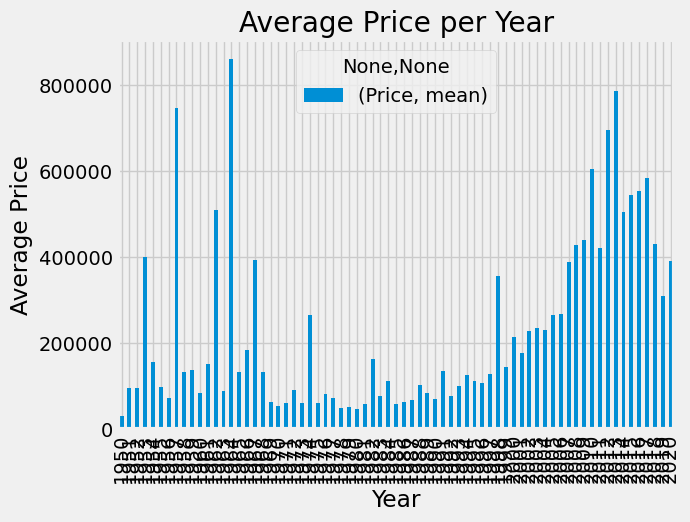

In [9]:
df.groupby('Year').agg({'Price': ['mean']}).plot.bar()
plt.title('Average Price per Year')
plt.xlabel('Year')
plt.ylabel('Average Price')

In [10]:
df2.head()

,Price
,mean
Year,
1950,29669.820833
1951,95477.916667
1952,95137.500000
1953,399900.000000
1954,155015.000000


#### Fixing the Year format as the index

In [11]:
df2['Year'] = df2.index

In [12]:
# convert year column into a datetimeindex format
df2.index = pd.to_datetime(df2['Year'], format='%Y')
df2.head()

,Price,Year
,mean,
Year,,
1950-01-01,29669.820833,1950
1951-01-01,95477.916667,1951
1952-01-01,95137.500000,1952
1953-01-01,399900.000000,1953
1954-01-01,155015.000000,1954


In [13]:
df2.drop('Year', axis=1, inplace=True)

In [14]:
df2.head()

,Price
,mean
Year,
1950-01-01,29669.820833
1951-01-01,95477.916667
1952-01-01,95137.500000
1953-01-01,399900.000000
1954-01-01,155015.000000


#### Time Series Visualization

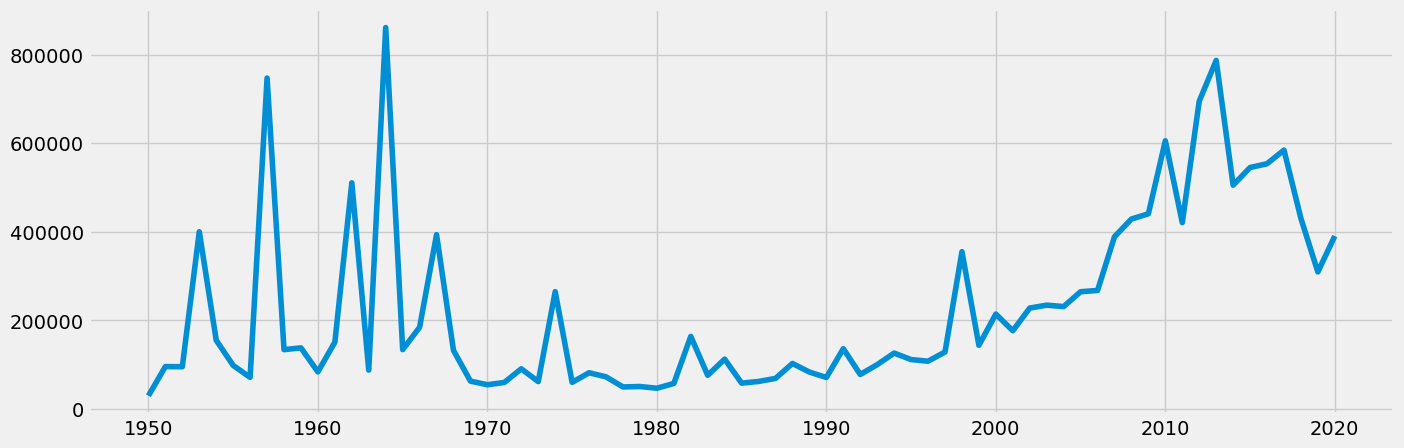

In [15]:
# The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, 
# you'll have a lot of plots. A large number of plots will increase the size of the notebook, 
# which could take more time to load and eat up a lot of RAM!
plt.figure(figsize=(15,5), dpi=100) 
plt.plot(df2)

### 4. Decomposition

In [16]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(df2, model='additive')

In [17]:
from pylab import rcParams 
# This will define a fixed size for all special charts.
rcParams['figure.figsize'] = 18, 7

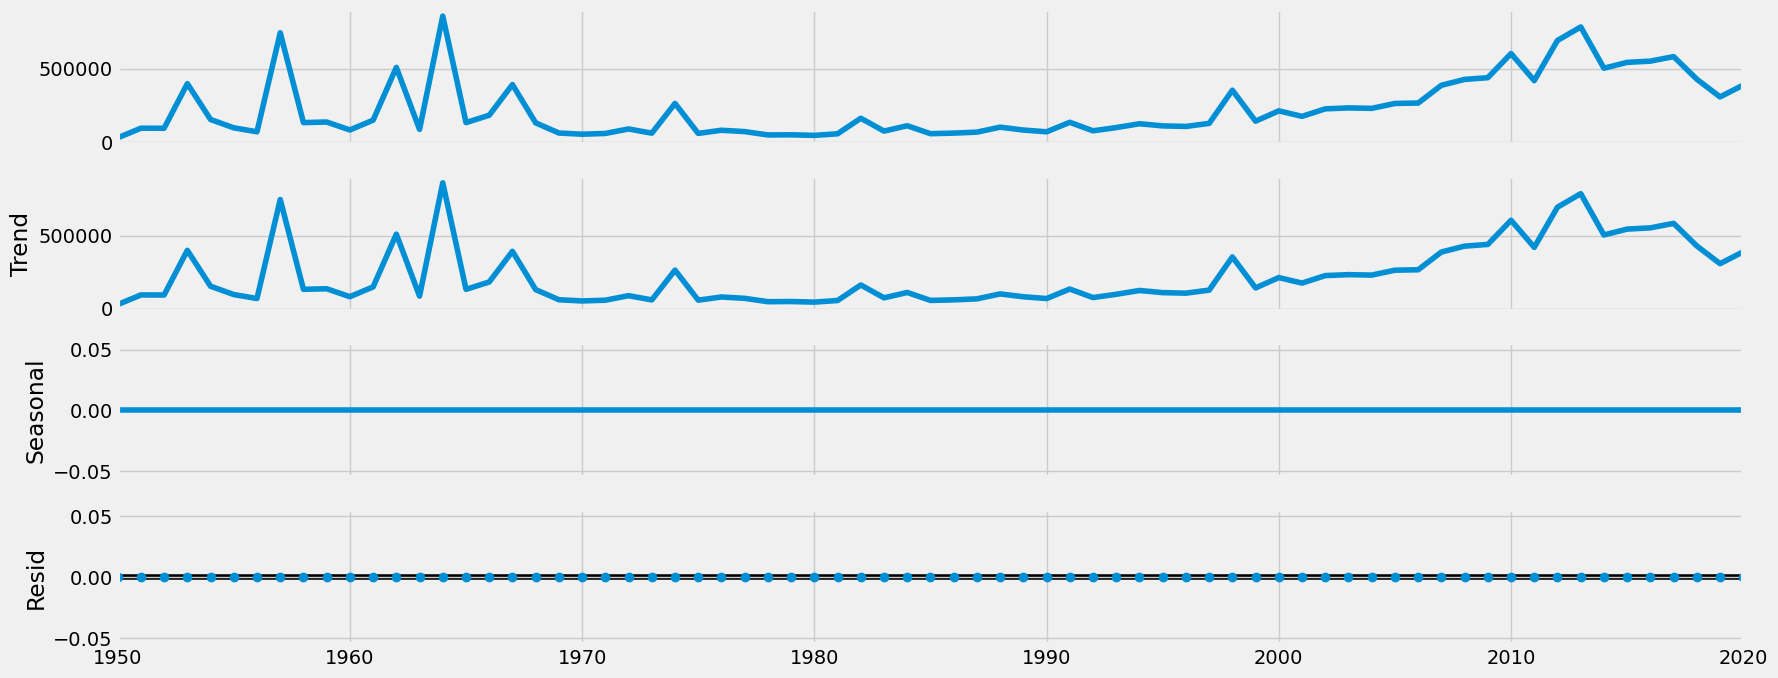

In [18]:
# Plot the separate components
decomposition.plot()
plt.show()

### Note:
    
1. The first chart in the figure above is the data itself (including all of its components). 
This is called **"The Level"**.
2. The second is **"The Underlying Trend"**. If you were working with unsmoothed data, your level 
and trend would differ. But *because you’re working with data that doesn’t have much noise (and, 
thus, didn’t need to be smoothed), the level and trend appear the same*. Remember that noise 
represents any fluctuations that aren’t explained by the trend, so when the noise is removed 
(especially if there is a lot of it), the trend will likely differ.
3. The trend in the chart above gradually goes upward after 1990. While there are some fluctuations
after 2010, which may due to the instability in world economy, the overall trend continues to 
increase all the way until the present year. This is called a dominant trend.
4. The third component is **"The Seasonality"**. Here we see that the line is totally flat,
which means there is no seasonality at all in the data.
5. And finally comes **"The Noise"** —or, as it’s called here, **“Residual”**. Think of it as what’s 
left of the data after the trend and seasonality have been extracted (hence the term residual). 
We can see here that the line is also flat, which indicates data does not contain any "Noise" elements.
6. **Conclusion**: since we do not have to worry about Seasonality and Noise, then the only thing
that needs to be 'removed' is the Underlying Trend to make the data stationary.

### 5. Testing for stationarity and autocorrelation

To summarize, there are two main factors that could prove problematic when forecasting: non-stationarity and autocorrelation. You need to check for both of these before moving on with your forecast modeling. Let’s start by testing for stationarity!

#### Testing stationarity

The test you’ll use is called the Dickey-Fuller test, which is a statistical test that checks for the presence of a unit root. A unit root is any random jump that can’t be explained by variation in the data—in other words, a jump that’s not constant (which, as you’ll remember, is exactly what makes a time series non-stationary!).

In [19]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df2['Price'])

Dickey-Fuller Stationarity test:
Test Statistic                 -2.503079
p-value                         0.114727
Number of Lags Used            12.000000
Number of Observations Used    58.000000
Critical Value (1%)            -3.548494
Critical Value (5%)            -2.912837
Critical Value (10%)           -2.594129
dtype: float64


The Dickey-Fuller test is set up just like a statistical hypothesis test. To conduct such a test, you first need to determine the null and alternative. The null hypothesis in this case would be the presence of a unit root (you want to disprove that there’s a unit root, which would mean that your data is stationary). Correspondingly, the alternative hypothesis is that there’s no unit root. If you can’t rule out the null hypothesis, your data is non-stationary.

First is your test statistic, which is the direct result of the statistical test—this is 
your most important value. Below this is the p-value, which indicates whether the test 
result is significant. A “significant” result would be a p-value of less than 0.05.
Our **p-value is 0.114727**, that the result is not significant.

In this case, let’s say you’re using a significance level of 5 percent. You’d need to look at 
the **“Critical Value (5%)”** in the results, which, in this example, has a value of **-2.912837**. 
This is smaller than the test statistic, which is -2.503079, which means that you can’t 
reject the null hypothesis.
What does this mean? That there is a unit root in your data, and your data is non-stationary. 
While this is what you already guessed by looking at the chart, it’s always important to run 
proper tests to back up your assumptions with statistical results.


#### Testing for Autocorrelation

Autocorrelation refers to a serial relationship between occurrences that are equal or 
very similar at a given time interval. The example given was that of residential electricity 
usage: households generally use less electricity during the day while its residents are at 
    work or school and more electricity during the evening when more people are home. This 
    means that electrical consumption values at noon on day two of the series will likely be 
    correlated to the values of electrical consumption at noon on day one—they express the 
    same pattern.

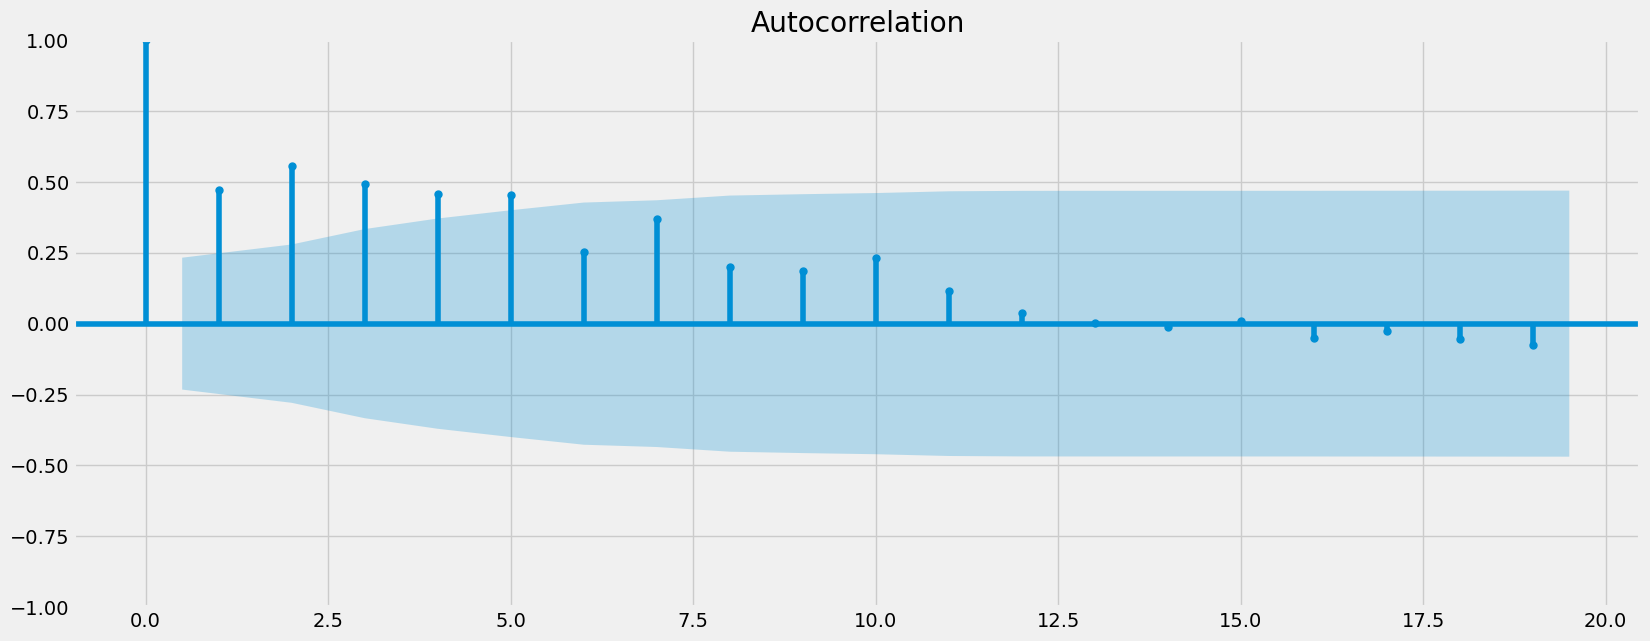

In [20]:
# Check out a plot of autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots
plot_acf(df2)
plt.show()

The vertical lines represent the lags in the series, while the blue area represents the confidence 
interval. **When lines go above the blue edge of the confidence interval, this means we have lags 
that are significantly correlated with each other**. And when we have many lags beyond this 
interval, we can deduce that your data is non-stationary. 

As we can see from the above example, the Boat Sales time series has six lags correlated 
with each other. This means there are some autocorrelated data and the set is likely non-stationary, 
which supports the result of the Dickey-Fuller test we conducted earlier.

### 6. Stationarizing Boat Sales Data

Remember from Exercise 5.6: Time Series Analysis & Forecasting that a stationary time series refers to one whose statistical measures (e.g., mean, variance, etc.) remain constant. If the mean of a time series increases or decreases over a certain period of time, that time series isn’t stationary. The most important thing to remember about stationarity is that it has nothing to do with the data itself, rather the underlying nature and mechanisms that drive it.

Why do you need to care about stationarity? Well, when it comes to forecasting, you need data with properties that don’t change; otherwise, you won’t have a reliable basis on which to build your forecast. Think about it this way: if the way the data’s changing is itself changing, then you have no way to predict how the data will evolve in the future.

Unfortunately, due to imperfect conditions, you won’t always have stationary time series data to 
work with. That’s why you’re going to look at a few steps you can follow to force stationarity 
onto it. Let’s take a look!

One of the biggest factors affecting a time series’ stationarity is trend. After all, if your 
data has, say, a downward trend (as in the example data), this implies the mean and variance 
of the series grows smaller and smaller over time—meaning that it’s not constant. 

#### Differencing

In [21]:
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)
data_diff = df2 - df2.shift(1)

In [22]:
# Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.
data_diff.dropna(inplace = True) 

In [23]:
data_diff.head()

,Price
,mean
Year,
1951-01-01,65808.095833
1952-01-01,-340.416667
1953-01-01,304762.500000
1954-01-01,-244885.000000
1955-01-01,-56867.715000


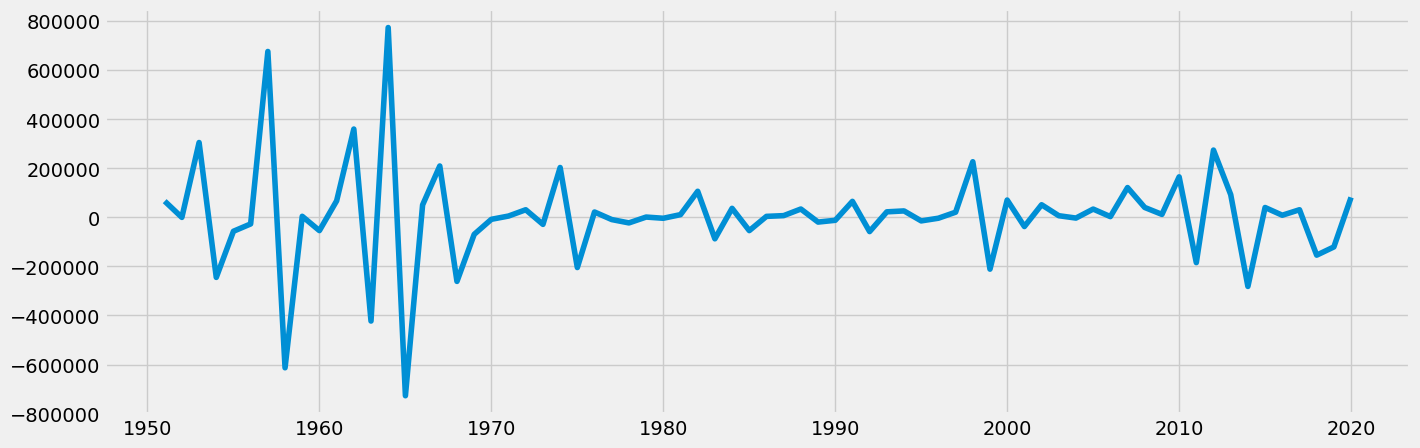

In [24]:
# Check out what the differencing did to the time-series curve
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

The idea behind differencing is to transform our time series into a new time series, with 
each new value in that time series calculated by subtracting the previous data point from 
the current data point (essentially, subtracting the lag of a data point from the current 
data point).

Already, the values on the y-axis have changed greatly. This is because, **by stationarizing 
data, we’re effectively getting rid of the data’s trend**. The trend is what gave the data it’s 
downward/upward slope. Without it, we have a much more horizontal line.


#### Rerun dickey_fuller and autocorrelation tests again after differencing the data

The hope is to see our data become more stationary.

In [25]:
# Running dickey_fuller test again
dickey_fuller(data_diff['Price'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.853841
p-value                         0.354077
Number of Lags Used            10.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
dtype: float64


#### Observations

Our **p-value of 0.354077** indicates that the result is not significant.

We to look at the **“Critical Value (5%)”** in the results, which, in this example, has a value 
of **-2.911939**. 
This is smaller than the test statistic, which is -1.853841, which means that you can’t 
reject the null hypothesis. It means there is a unit root in your data, and our data is still
non-stationary. 


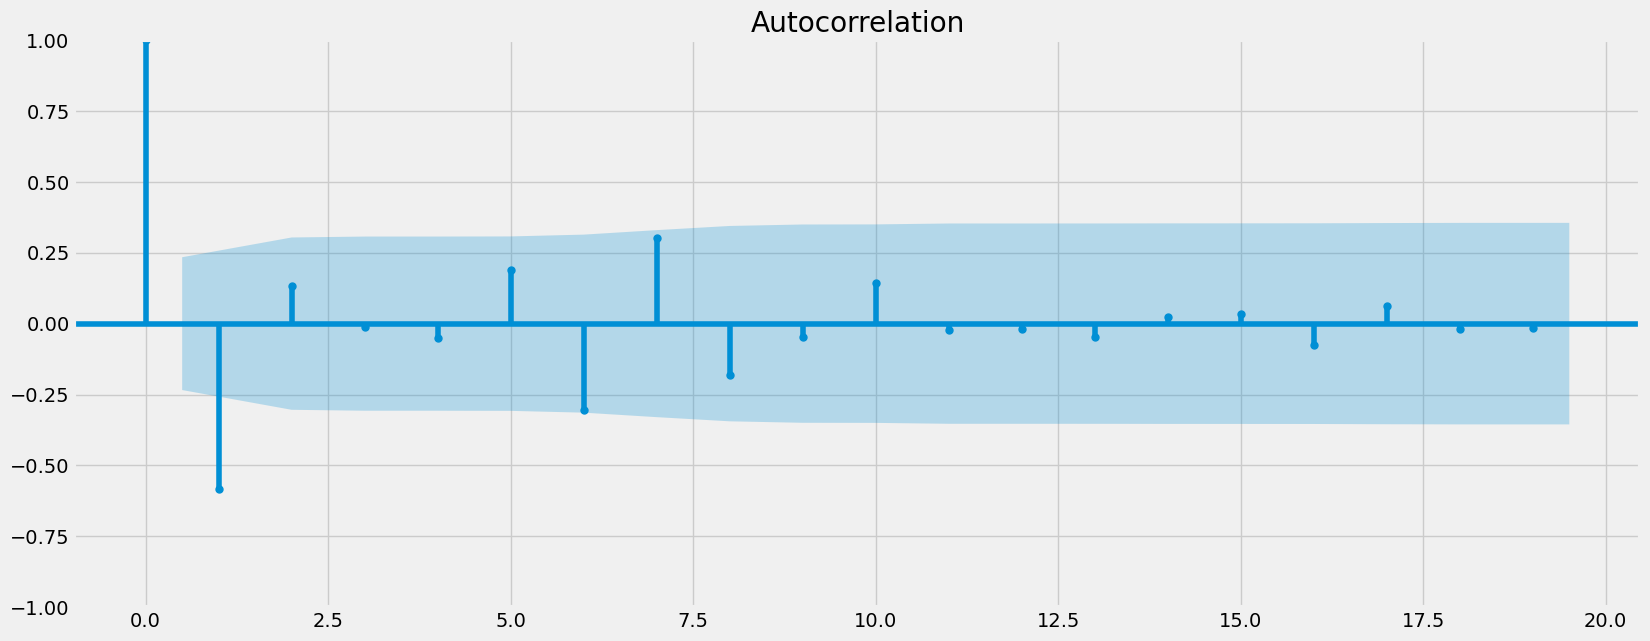

In [26]:
# Test the autocorrelation again after performing Differencing
plot_acf(data_diff)
plt.show()

#### Observations

This time the Boat Sales time series has only 2 lags correlated with each other, which is smaller lags than
the previous test. Although the data is getting closer to be a stationary data, however there are 
still some autocorrelated data and therefore we consider the set to be non-stationary, 

### --------------  End of Boat Analysis Part 6  ------------------